In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *


done1


In [81]:
#defining the function to calculate variable counts in all samples:

sample_name='HIP00110'
param='d5Deletion'

# def EventVariableCountForSample(sample_name, param):

sample_df1 = pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/%s.tsv" % sample_name)
countDF1=pd.DataFrame(sample_df1[param].value_counts(normalize=True))
countDF1=countDF1.rename(columns={'%s' %param: '%s' %sample_name})
print len(countDF1)

12


# concatenate jGeneName counts for all samples:

number of dfs in directory: 587
the length of df list is 587
number of jGeneName values=14


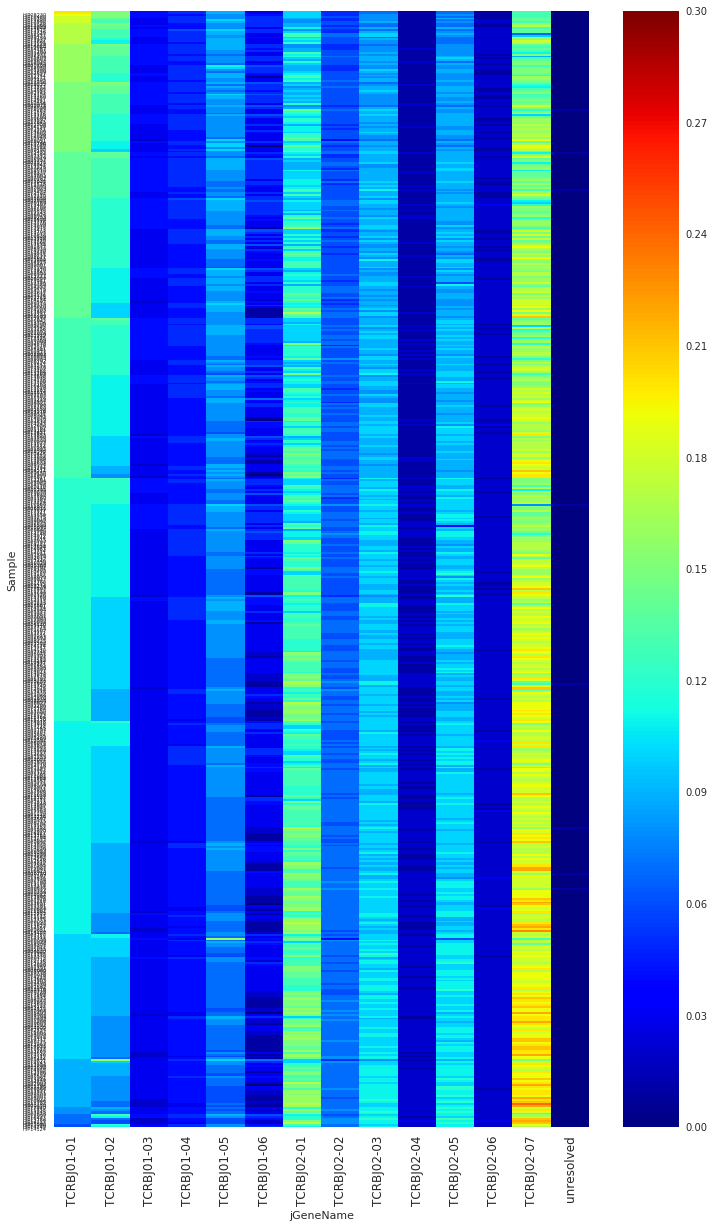

In [103]:
# concatenate all dfs resulting from optimization runs:
param='jGeneName'
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/event_variable_counts/variableCountForSample'
variableCountForSample=concat_summarizing_dfs(dfs_folder)
columns=list(variableCountForSample.columns.values)
variableCountForSample=variableCountForSample.round(2)  ## change here to increase precision
variableCountForSample=variableCountForSample.sort_values(by=columns)
print('number of %s values=%s' %(param, len(columns)))

# plot image:
fig,ax=plt.subplots(figsize=(12,20))
cmap=plt.get_cmap('jet')
# plt.pcolor(variableCountForSample,cmap=cmap)
plt.pcolor(variableCountForSample,vmin=0,vmax=0.3,cmap=cmap) ## change vmax if necessary
plt.colorbar()   
plt.yticks(np.arange(len(variableCountForSample.index))+0.5, variableCountForSample.index, fontsize=5,va='top')
plt.xticks(np.arange(len(variableCountForSample.columns))+0.5, variableCountForSample.columns, rotation=90, fontsize=12) 
plt.xlim(0, len(variableCountForSample.columns))
plt.ylim(0, len(variableCountForSample.index))
plt.xlabel('%s' %param)
plt.ylabel('Sample')
#plt.title('%s_p(%s|%s)_%s' %(sample_name, var1, var2, feature))
plt.show()

figfile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/event_variable_counts/%s_variableCount_heatmap' %param
fig.savefig(filename=figfile,dpi=200)

number of dfs in directory: 587
the length of df list is 587
number of vGeneName values=68


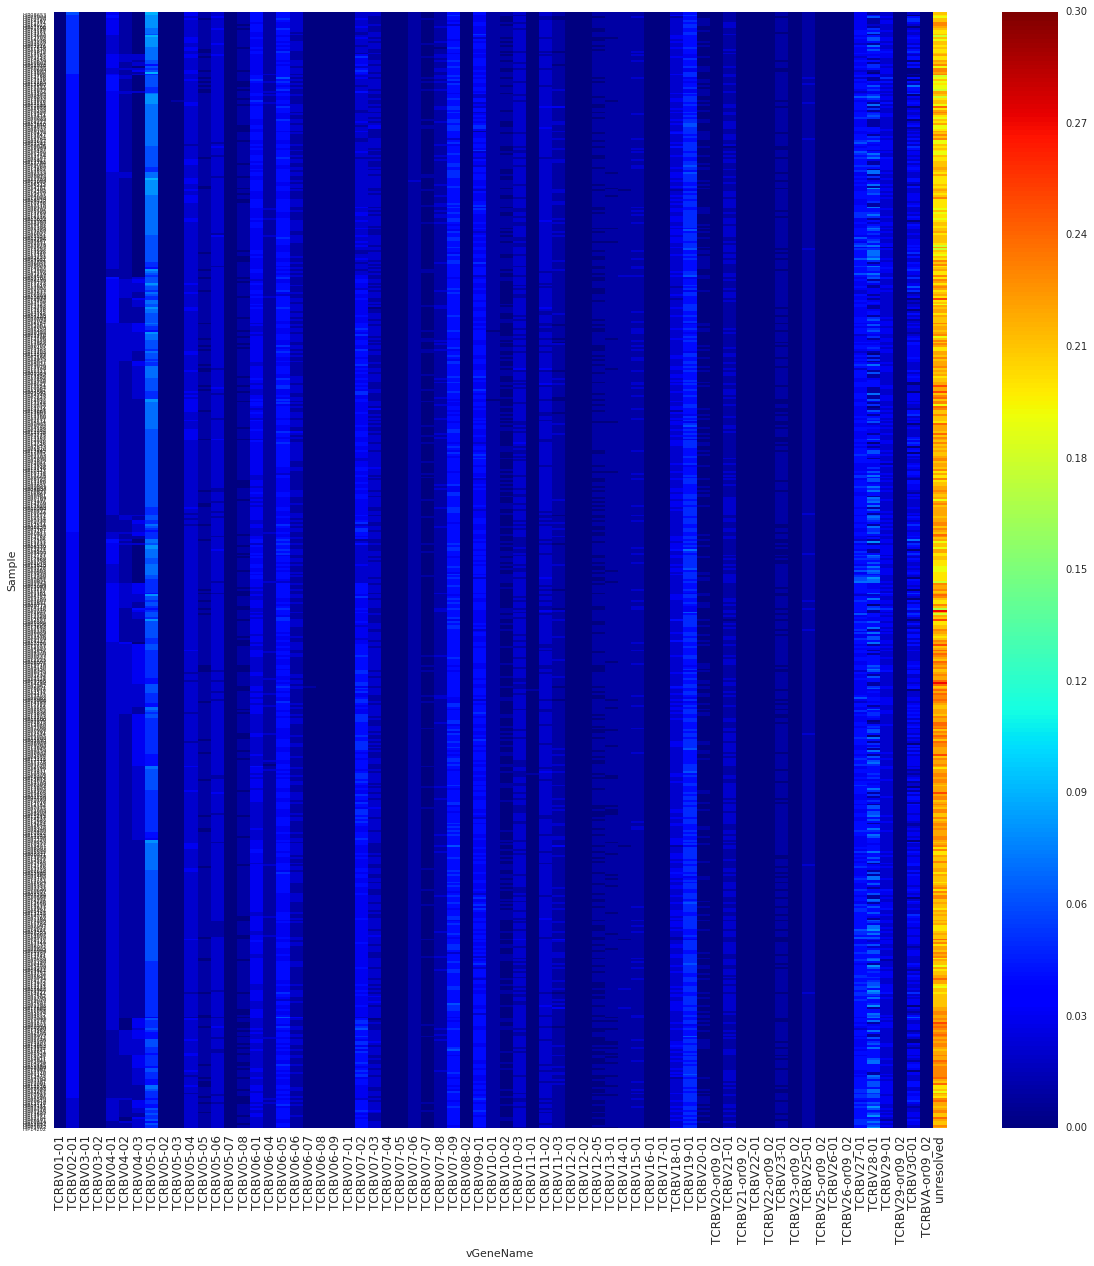

In [101]:
# concatenate all dfs resulting from optimization runs:
param='vGeneName'
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/event_variable_counts/vGeneNamecCount'
variableCountForSample=concat_summarizing_dfs(dfs_folder)
columns=list(variableCountForSample.columns.values)
variableCountForSample=variableCountForSample.round(2)  ## change here to increase precision
variableCountForSample=variableCountForSample.sort_values(by=columns)
print('number of %s values=%s' %(param, len(columns)))

# plot image:
fig,ax=plt.subplots(figsize=(20,20))
cmap=plt.get_cmap('jet')
# plt.pcolor(variableCountForSample,cmap=cmap)
plt.pcolor(variableCountForSample,vmin=0,vmax=0.3,cmap=cmap) ## change vmax if necessary
plt.colorbar()   
plt.yticks(np.arange(len(variableCountForSample.index))+0.5, variableCountForSample.index, fontsize=5,va='top')
plt.xticks(np.arange(len(variableCountForSample.columns))+0.5, variableCountForSample.columns, rotation=90, fontsize=12) 
plt.xlim(0, len(variableCountForSample.columns))
plt.ylim(0, len(variableCountForSample.index))
plt.xlabel('%s' %param)
plt.ylabel('Sample')
#plt.title('%s_p(%s|%s)_%s' %(sample_name, var1, var2, feature))
plt.show()

figfile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/event_variable_counts/%s_variableCount_heatmap' %param
fig.savefig(filename=figfile,dpi=200)

number of dfs in directory: 587
the length of df list is 587
number of n1Insertion values=62


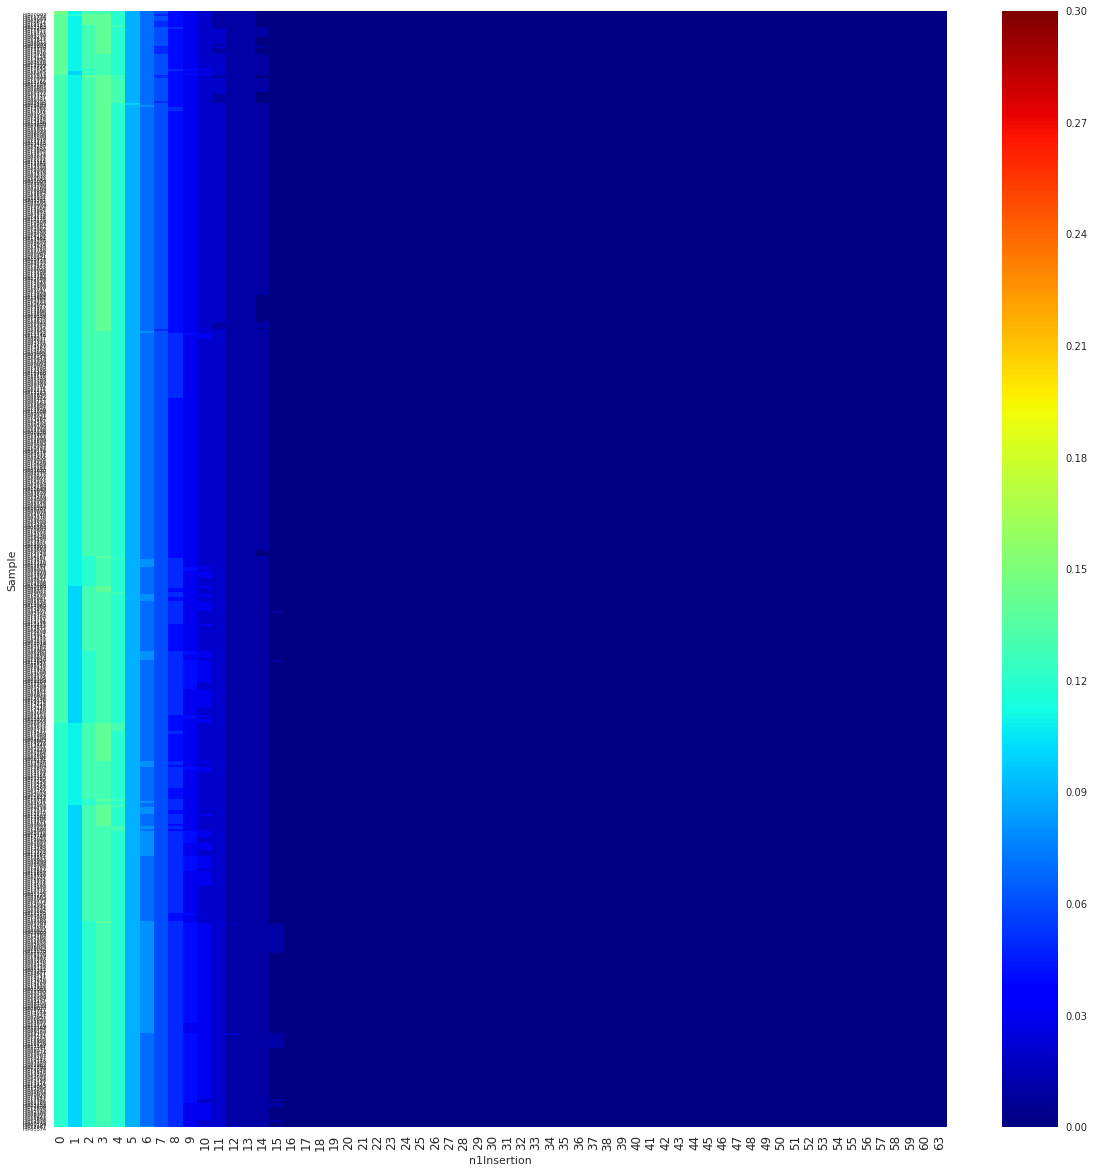

In [100]:
# concatenate all dfs resulting from optimization runs:
param='n1Insertion'
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/event_variable_counts/ins1Counts'
variableCountForSample=concat_summarizing_dfs(dfs_folder)
columns=list(variableCountForSample.columns.values)
variableCountForSample=variableCountForSample.round(2)  ## change here to increase precision
variableCountForSample=variableCountForSample.sort_values(by=columns)
print('number of %s values=%s' %(param, len(columns)))

# plot image:
fig,ax=plt.subplots(figsize=(20,20))
cmap=plt.get_cmap('jet')
# plt.pcolor(variableCountForSample,cmap=cmap)
plt.pcolor(variableCountForSample,vmin=0,vmax=0.3,cmap=cmap) ## change vmax if necessary
plt.colorbar()   
plt.yticks(np.arange(len(variableCountForSample.index))+0.5, variableCountForSample.index, fontsize=5,va='top')
plt.xticks(np.arange(len(variableCountForSample.columns))+0.5, variableCountForSample.columns, rotation=90, fontsize=12) 
plt.xlim(0, len(variableCountForSample.columns))
plt.ylim(0, len(variableCountForSample.index))
plt.xlabel('%s' %param)
plt.ylabel('Sample')
#plt.title('%s_p(%s|%s)_%s' %(sample_name, var1, var2, feature))
plt.show()

figfile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/event_variable_counts/%s_variableCount_heatmap' %param
fig.savefig(filename=figfile,dpi=200)

number of dfs in directory: 587
the length of df list is 587
number of n2Insertion values=61


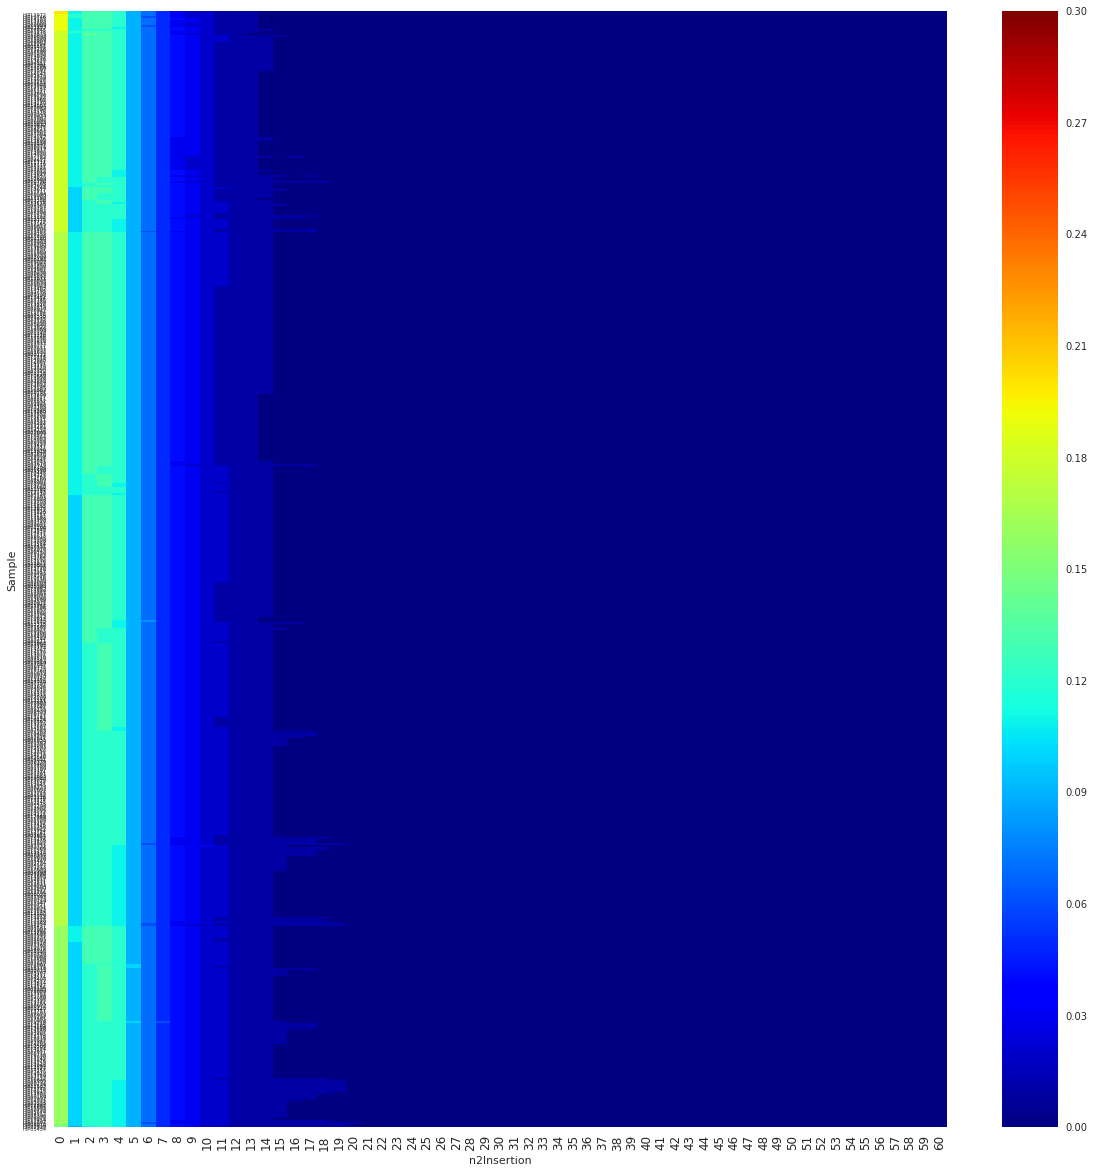

In [105]:
# concatenate all dfs resulting from optimization runs:
param='n2Insertion'
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/event_variable_counts/ins2Counts'
variableCountForSample=concat_summarizing_dfs(dfs_folder)
columns=list(variableCountForSample.columns.values)
variableCountForSample=variableCountForSample.round(2)  ## change here to increase precision
variableCountForSample=variableCountForSample.sort_values(by=columns)
print('number of %s values=%s' %(param, len(columns)))

# plot image:
fig,ax=plt.subplots(figsize=(20,20))
cmap=plt.get_cmap('jet')
# plt.pcolor(variableCountForSample,cmap=cmap)
plt.pcolor(variableCountForSample,vmin=0,vmax=0.3,cmap=cmap) ## change vmax if necessary
plt.colorbar()   
plt.yticks(np.arange(len(variableCountForSample.index))+0.5, variableCountForSample.index, fontsize=5,va='top')
plt.xticks(np.arange(len(variableCountForSample.columns))+0.5, variableCountForSample.columns, rotation=90, fontsize=12) 
plt.xlim(0, len(variableCountForSample.columns))
plt.ylim(0, len(variableCountForSample.index))
plt.xlabel('%s' %param)
plt.ylabel('Sample')
#plt.title('%s_p(%s|%s)_%s' %(sample_name, var1, var2, feature))
plt.show()

figfile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/event_variable_counts/%s_variableCount_heatmap' %param
fig.savefig(filename=figfile,dpi=200)

number of dfs in directory: 587
the length of df list is 587
number of dFamilyName values=2


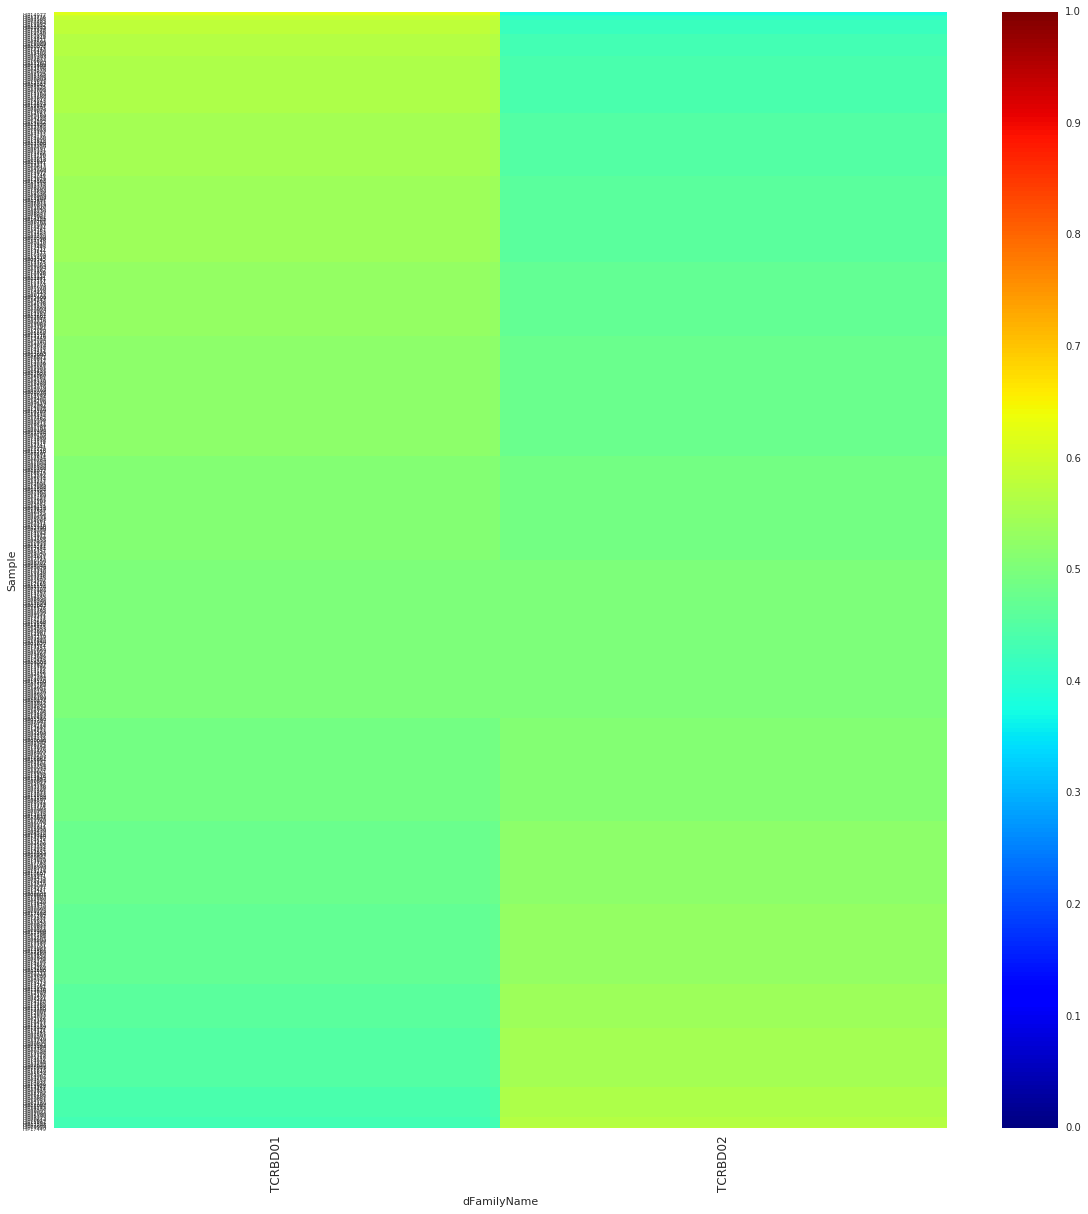

In [107]:
# concatenate all dfs resulting from optimization runs:
param='dFamilyName'
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/event_variable_counts/dFamilyNameCount'
variableCountForSample=concat_summarizing_dfs(dfs_folder)
columns=list(variableCountForSample.columns.values)
variableCountForSample=variableCountForSample.round(2)  ## change here to increase precision
variableCountForSample=variableCountForSample.sort_values(by=columns)
print('number of %s values=%s' %(param, len(columns)))

# plot image:
fig,ax=plt.subplots(figsize=(20,20))
cmap=plt.get_cmap('jet')
# plt.pcolor(variableCountForSample,cmap=cmap)
plt.pcolor(variableCountForSample,vmin=0,vmax=1,cmap=cmap) ## change vmax if necessary
plt.colorbar()   
plt.yticks(np.arange(len(variableCountForSample.index))+0.5, variableCountForSample.index, fontsize=5,va='top')
plt.xticks(np.arange(len(variableCountForSample.columns))+0.5, variableCountForSample.columns, rotation=90, fontsize=12) 
plt.xlim(0, len(variableCountForSample.columns))
plt.ylim(0, len(variableCountForSample.index))
plt.xlabel('%s' %param)
plt.ylabel('Sample')
#plt.title('%s_p(%s|%s)_%s' %(sample_name, var1, var2, feature))
plt.show()

figfile='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/event_variable_counts/%s_variableCount_heatmap' %param
fig.savefig(filename=figfile,dpi=200)

In [ ]:
vGeneNamecCount

In [ ]:
vGeneNamecCount

# trying to calculate joint probabilites

In [94]:
#defining the function to calculate variable counts in all samples:

sample_name='HIP00110'
par2='jGeneName'
par1='dFamilyName'

# def EventVariableCountForSample(sample_name, param):

sample_df1 = pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/%s.tsv" % sample_name)
countDF1 = sample_df1.groupby([par1,par2]).agg({'nucleotide': 'count'}).apply(lambda x: x / float(x.sum()))
countDF1=countDF1.rename(columns={'nucleotide': '%s' %sample_name})

# countDF1=sample_df1.groupby([par1,par2]).apply(lambda x: 100 * x / float(x.sum()))
countDF1





# countDF1=countDF1.rename(columns={'%s' %param: '%s' %sample_name})
# print len(countDF1)

HIP00110
dFamilyName jGeneName           
TCRBD01     TCRBJ01-01  0.074084
            TCRBJ01-02  0.080872
            TCRBJ01-03  0.023700
            TCRBJ01-04  0.028478
            TCRBJ01-05  0.050560
            TCRBJ01-06  0.033128
            TCRBJ02-01  0.035453
            TCRBJ02-02  0.030087
            TCRBJ02-03  0.032510
            TCRBJ02-04  0.007357
            TCRBJ02-05  0.040544
            TCRBJ02-06  0.009045
            TCRBJ02-07  0.088710
            unresolved  0.000490
TCRBD02     TCRBJ01-01  0.041329
            TCRBJ01-02  0.036747
            TCRBJ01-03  0.012458
            TCRBJ01-04  0.014607
            TCRBJ01-05  0.025368
            TCRBJ01-06  0.014940
            TCRBJ02-01  0.068678
            TCRBJ02-02  0.034030
            TCRBJ02-03  0.068708
            TCRBJ02-04  0.007760
            TCRBJ02-05  0.060938
            TCRBJ02-06  0.005876
            TCRBJ02-07  0.072818
            unresolved  0.000726

In [95]:

df_file_names,samples_with_df=get_sample_with_dfs()
par2='jGeneName'
par1='dFamilyName'

sample_list = samples_with_df
count=1
for sample_name in sample_list:
    print count, sample_name
    sample_df1 = pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/%s.tsv" % sample_name)
    countDF1 = sample_df1.groupby([par1,par2]).agg({'nucleotide': 'count'}).apply(lambda x: x / float(x.sum()))
    countDF1=countDF1.rename(columns={'nucleotide': '%s' %sample_name})
    filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/event_variable_counts/%s_%s_%s_variable_count' %(par1,par2,sample_name)
    countDF1.T.to_pickle(filename)
    count=count+1

getting list of samples that have dfs...
finished getting list of samples that have dfs
1 HIP11513
2 HIP08200
3 HIP00769
4 HIP09122
5 HIP12091
6 HIP13710
7 HIP13789
8 HIP02947
9 HIP03732


/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


10 HIP14143
11 HIP14134
12 HIP14039
13 HIP13933
14 HIP14237
15 HIP14240
16 HIP11717
17 HIP11784
18 HIP02663
19 HIP13939
20 HIP14911
21 HIP02805
22 HIP13318
23 HIP19048
24 HIP05398
25 HIP04480
26 HIP13722
27 HIP13658
28 HIP13185
29 HIP03597
30 HIP12703


/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


31 HIP14205
32 HIP13976
33 HIP05535
34 HIP18119
35 HIP13806
36 HIP13992
37 HIP13871
38 HIP08821
39 HIP08598
40 HIP11758
41 HIP01181
42 HIP00707
43 HIP14127
44 HIP13703
45 HIP13774
46 HIP12088
47 HIP03216
48 HIP13709
49 HIP11857
50 HIP03651
51 HIP14020
52 HIP06191
53 HIP01266
54 HIP00924
55 HIP15861
56 HIP13920
57 HIP05563
58 HIP09190
59 HIP13746
60 HIP14018
61 HIP13376
62 HIP13636
63 HIP09097
64 HIP01223
65 HIP00985


/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,11,13,18,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


66 HIP13981


/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


67 HIP10564
68 HIP05551
69 HIP13178
70 HIP01253
71 HIP03484
72 HIP13865
73 HIP13986
74 HIP10480
75 HIP10514
76 HIP13818
77 HIP17793
78 HIP13962
79 HIP02742
80 HIP15854
81 HIP08711
82 HIP12129
83 HIP13736
84 HIP13741
85 HIP13306
86 HIP14118
87 HIP14015
88 HIP14181
89 HIP12123
90 HIP02811
91 HIP09235
92 HIP14223
93 HIP11774
94 HIP09775
95 HIP08977
96 HIP14157
97 HIP00777
98 HIP04545
99 HIP04532
100 HIP09046
101 HIP03385
102 HIP01805
103 HIP08653
104 HIP01162
105 HIP13233
106 HIP13244
107 HIP14202
108 HIP09364
109 HIP10507
110 HIP00805
111 HIP02875
112 HIP14192
113 HIP14071
114 HIP02112
115 HIP13265
116 HIP03677
117 HIP16738
118 HIP08345
119 HIP14176
120 HIP14095
121 HIP03693
122 HIP08702
123 HIP17837
124 HIP01597
125 HIP10445
126 HIP13414
127 HIP14230
128 HIP01391
129 HIP08439
130 HIP13949
131 HIP13833
132 HIP13220
133 HIP14043
134 HIP14034
135 HIP00614
136 HIP03378
137 HIP13610
138 HIP03275
139 HIP09022
140 HIP13760
141 HIP10746
142 HIP13350
143 HIP12538
144 HIP10376
145 HIP08399
146 HI

/usr/wisdom/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,9,10,11,18,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


537 HIP13303
538 HIP14160
539 HIP13309
540 HIP14184
541 HIP04578
542 HIP10358
543 HIP02090
544 HIP08223
545 HIP04475
546 HIP14089
547 HIP05757
548 HIP03197
549 HIP00838
550 HIP03814
551 HIP00832
552 HIP05578
553 HIP08888
554 HIP05331
555 HIP13252
556 HIP02848
557 HIP10639
558 HIP12099
559 HIP13686
560 HIP14136
561 HIP08305
562 HIP00761
563 HIP13355
564 HIP01004
565 HIP05817
566 HIP05540
567 HIP13903
568 HIP00110
569 HIP01232
570 HIP13627
571 HIP17462
572 HIP01856
573 HIP13383
574 HIP13217
575 HIP15685
576 HIP08230
577 HIP14074
578 HIP03678
579 HIP05390
580 HIP14090
581 HIP14009
582 HIP08337
583 HIP13757
584 HIP09118
585 HIP13720
586 HIP17845
587 HIP09062


# trying to calculate dep probabilites

In [94]:
#defining the function to calculate variable counts in all samples:

sample_name='HIP00110'
indPar='vGeneName'
depPar='vDeletion'

# def EventVariableCountForSample(sample_name, param):

sample_df1 = pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/%s.tsv" % sample_name)
countDF1 = sample_df1.groupby([indPar,depPar]).agg({'nucleotide': 'count'}).groupby(level=0).apply(lambda x: x / float(x.sum()))
countDF1=countDF1.rename(columns={'nucleotide': '%s' %sample_name})

# countDF1=sample_df1.groupby([par1,par2]).apply(lambda x: 100 * x / float(x.sum()))
countDF1





# countDF1=countDF1.rename(columns={'%s' %param: '%s' %sample_name})
# print len(countDF1)

HIP00110
dFamilyName jGeneName           
TCRBD01     TCRBJ01-01  0.074084
            TCRBJ01-02  0.080872
            TCRBJ01-03  0.023700
            TCRBJ01-04  0.028478
            TCRBJ01-05  0.050560
            TCRBJ01-06  0.033128
            TCRBJ02-01  0.035453
            TCRBJ02-02  0.030087
            TCRBJ02-03  0.032510
            TCRBJ02-04  0.007357
            TCRBJ02-05  0.040544
            TCRBJ02-06  0.009045
            TCRBJ02-07  0.088710
            unresolved  0.000490
TCRBD02     TCRBJ01-01  0.041329
            TCRBJ01-02  0.036747
            TCRBJ01-03  0.012458
            TCRBJ01-04  0.014607
            TCRBJ01-05  0.025368
            TCRBJ01-06  0.014940
            TCRBJ02-01  0.068678
            TCRBJ02-02  0.034030
            TCRBJ02-03  0.068708
            TCRBJ02-04  0.007760
            TCRBJ02-05  0.060938
            TCRBJ02-06  0.005876
            TCRBJ02-07  0.072818
            unresolved  0.000726